In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_2_cat = pd.read_csv("categories_datasets/2_categories.csv")
df_2_cat

,coord_x,coord_y,category
0,203.175900,185.107149,a
1,178.999121,205.587416,a
2,154.055528,192.339881,a
3,211.160136,209.633947,a
4,185.962405,191.852619,a
...,...,...,...
171,462.432157,242.373334,b
172,490.564537,235.205822,b
173,444.010085,262.168997,b
174,424.691566,226.654325,b


In [3]:
df_2_cat["category"].unique()

array(['a', 'b'], dtype=object)

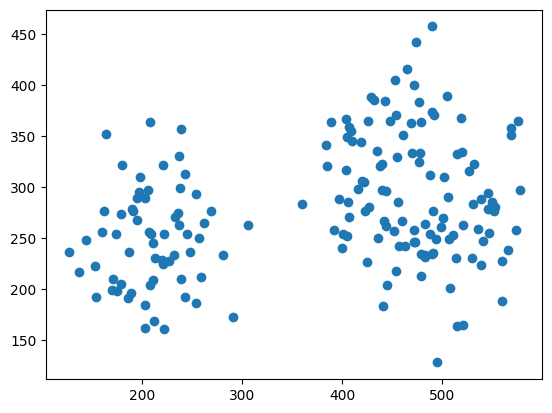

In [5]:
plt.scatter(df_2_cat["coord_x"], df_2_cat["coord_y"]);

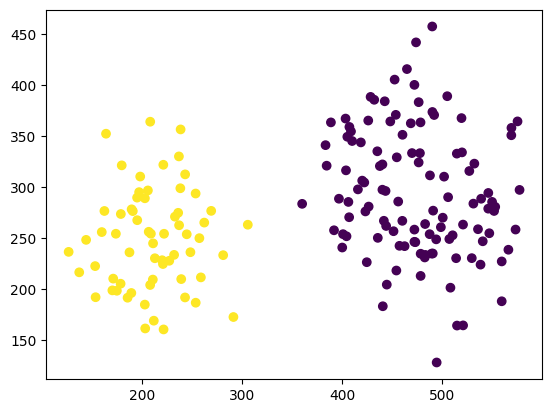

In [7]:
plt.scatter(df_2_cat["coord_x"], df_2_cat["coord_y"], c=df_2_cat["category"]=="a");

In [8]:
df_4_cat = pd.read_csv("categories_datasets/4_categories.csv")
df_4_cat

,coord_x,coord_y,category
0,124.703038,350.089618,a
1,127.948668,417.534316,a
2,80.817806,395.823458,a
3,126.107518,383.713659,a
4,121.863843,355.151238,a
...,...,...,...
913,597.447179,80.049176,d
914,552.212837,77.267115,d
915,582.085716,58.248150,d
916,581.338270,55.497262,d


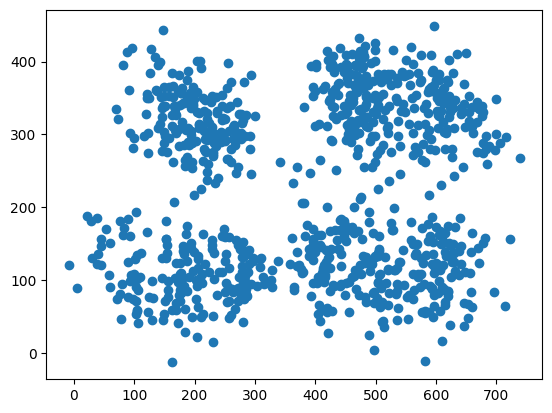

In [9]:
plt.scatter(df_4_cat["coord_x"], df_4_cat["coord_y"]);

In [10]:
df_4_cat["category"].unique()

array(['a', 'b', 'c', 'd'], dtype=object)

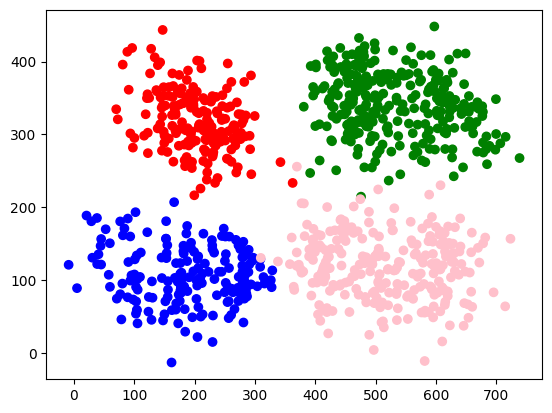

In [11]:
plt.scatter(df_4_cat["coord_x"], df_4_cat["coord_y"], c=df_4_cat["category"].map({'a':"red", 'b':"blue", 'c':"green", 'd':"pink"}));

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
model_2_cat = DecisionTreeClassifier()

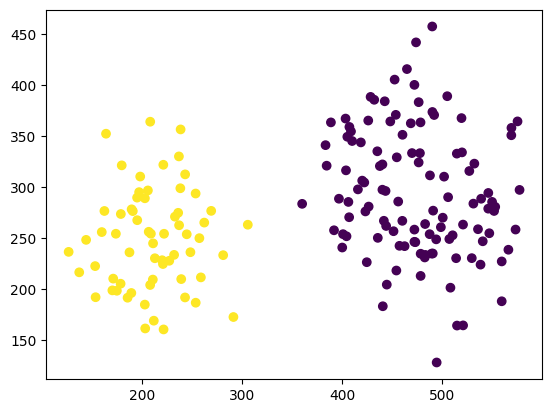

In [14]:
plt.scatter(df_2_cat["coord_x"], df_2_cat["coord_y"], c=df_2_cat["category"]=="a");

In [16]:
x_train = df_2_cat[["coord_x", "coord_y"]]
y_train = df_2_cat["category"] 

model_2_cat.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [17]:
x_train

,coord_x,coord_y
0,203.175900,185.107149
1,178.999121,205.587416
2,154.055528,192.339881
3,211.160136,209.633947
4,185.962405,191.852619
...,...,...
171,462.432157,242.373334
172,490.564537,235.205822
173,444.010085,262.168997
174,424.691566,226.654325


In [18]:
y_train

0      a
1      a
2      a
3      a
4      a
      ..
171    b
172    b
173    b
174    b
175    b
Name: category, Length: 176, dtype: object

# pip install graphviz

In [20]:
from sklearn.tree import export_graphviz
import graphviz

# 2 categorii


In [21]:
exported_data = export_graphviz(model_2_cat, feature_names=["coord_x", "coord_y"], class_names=["a", "b"], filled=True, rounded=True)
exported_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="coord_x <= 333.067\\ngini = 0.46\\nsamples = 176\\nvalue = [63, 113]\\nclass = b", fillcolor="#a7d4f3"] ;\n1 [label="gini = 0.0\\nsamples = 63\\nvalue = [63, 0]\\nclass = a", fillcolor="#e58139"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 113\\nvalue = [0, 113]\\nclass = b", fillcolor="#399de5"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n}'

In [22]:
graph_2_cat = graphviz.Source(exported_data)
graph_2_cat.render("2 categories", format="png")
graph_2_cat.view()

'2 categories.pdf'

# 4 categorii

In [24]:
model_4_cat = DecisionTreeClassifier()
x_train = df_4_cat[["coord_x", "coord_y"]]
y_train = df_4_cat["category"] 

model_4_cat.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [25]:
exported_data = export_graphviz(model_4_cat, feature_names=["coord_x", "coord_y"], class_names=["a", "b", "c", "d"], filled=True, rounded=True)
graph_4_cat = graphviz.Source(exported_data)
graph_4_cat.render("4 categories", format="png")
graph_4_cat.view()

'4 categories.pdf'